#CVPR Lab 5

Edge Detection, Line Detection and Corner Detection


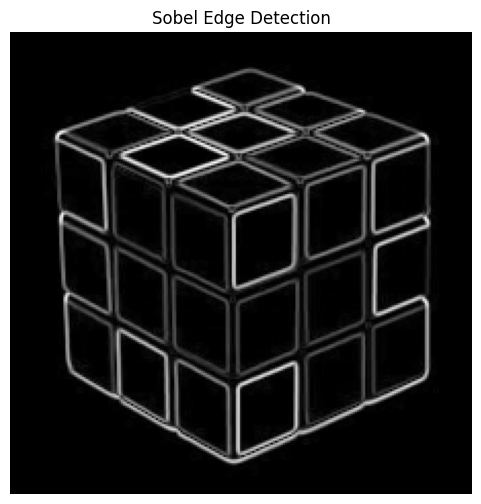

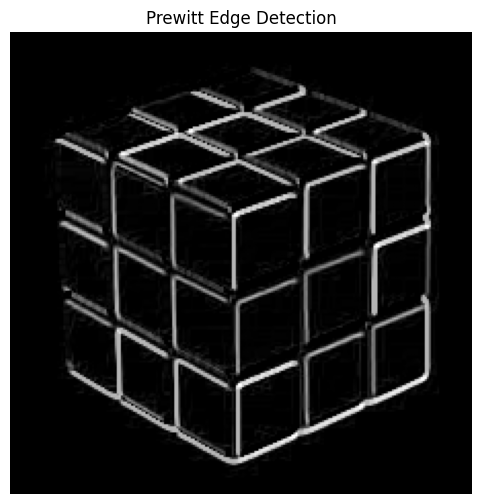

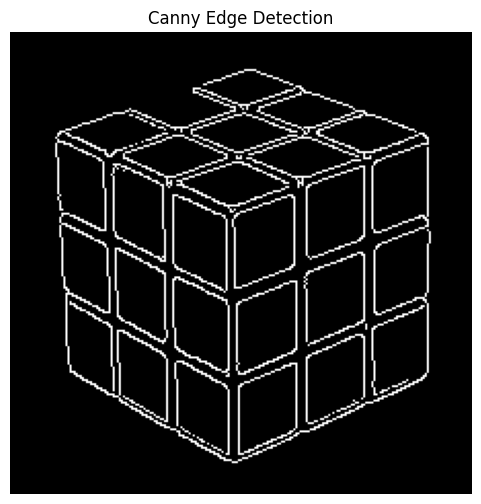

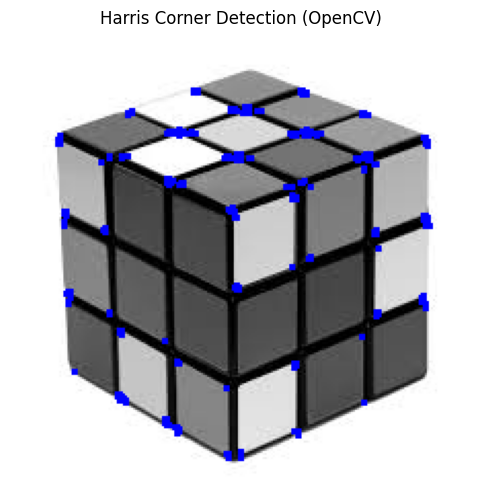

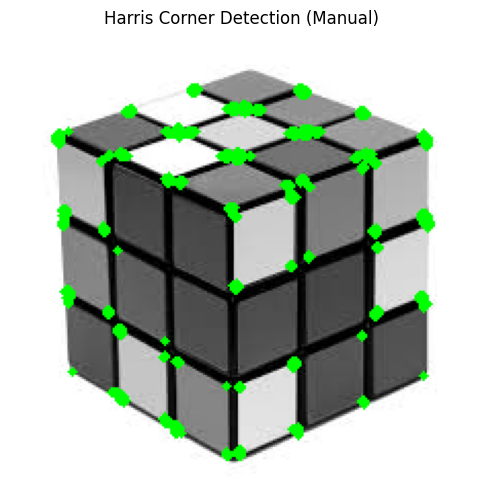

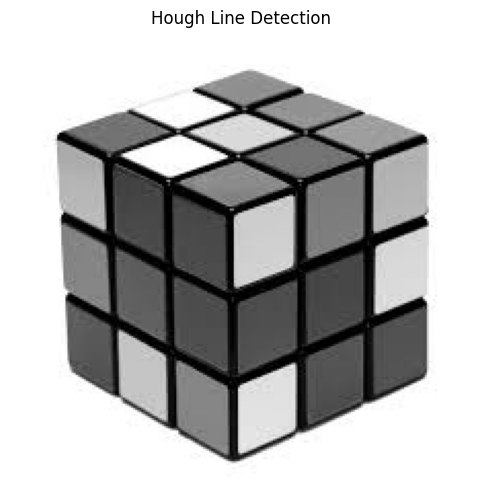

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("Rubic2.jpeg", cv2.IMREAD_GRAYSCALE)

# 1. Edge Detection using Sobel, Prewitt, and Canny Operators
def edge_detection(image):
    # Sobel Edge Detection
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)

    # Prewitt Edge Detection (Using filter2D)
    prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_edges = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

    # Canny Edge Detection
    canny_edges = cv2.Canny(image, 100, 200)

    return sobel_edges, prewitt_edges, canny_edges

sobel_edges, prewitt_edges, canny_edges = edge_detection(image)

# 2. Harris Corner Detection using OpenCV
def harris_corner_opencv(image):
    gray = np.float32(image)
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)  # Dilate to mark the corners
    image_harris = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    image_harris[dst > 0.01 * dst.max()] = [0, 0, 255]  # Mark corners in red
    return image_harris

harris_corners_opencv = harris_corner_opencv(image)

# 3. Harris Corner Detection without OpenCV's built-in function
def harris_corner_manual(image):
    gray = np.float32(image)
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy

    Ixx = cv2.GaussianBlur(Ixx, (3, 3), 1)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), 1)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), 1)

    k = 0.04
    response = (Ixx * Iyy - Ixy ** 2) - k * ((Ixx + Iyy) ** 2)

    image_harris_manual = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    threshold = 0.01 * response.max()
    for y in range(response.shape[0]):
        for x in range(response.shape[1]):
            if response[y, x] > threshold:
                cv2.circle(image_harris_manual, (x, y), 2, (0, 255, 0), -1)

    return image_harris_manual

harris_corners_manual = harris_corner_manual(image)


# Plot results
# Display Sobel Edge Detection
plt.figure(figsize=(6,6))
plt.imshow(sobel_edges, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

# Display Prewitt Edge Detection
plt.figure(figsize=(6,6))
plt.imshow(prewitt_edges, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()

# Display Canny Edge Detection
plt.figure(figsize=(6,6))
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

# Display Harris Corner Detection (OpenCV)
plt.figure(figsize=(6,6))
plt.imshow(harris_corners_opencv)
plt.title("Harris Corner Detection (OpenCV)")
plt.axis("off")
plt.show()

# Display Harris Corner Detection (Manual)
plt.figure(figsize=(6,6))
plt.imshow(harris_corners_manual)
plt.title("Harris Corner Detection (Manual)")
plt.axis("off")
plt.show()


